In [19]:
import pandas as pd 
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from scipy.stats import norm

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.duplicated().sum()

1

<AxesSubplot:>

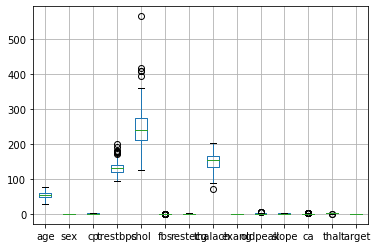

In [10]:
import matplotlib.pyplot as plt
df.boxplot(figsize = (15,9))

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

combined = lower + upper
combined

age         108.5
sex           1.0
cp            2.0
trestbps    260.0
chol        485.5
fbs           0.0
restecg       1.0
thalach     299.5
exang         1.0
oldpeak       1.6
slope         3.0
ca            1.0
thal          5.0
target        1.0
dtype: float64

<AxesSubplot:>

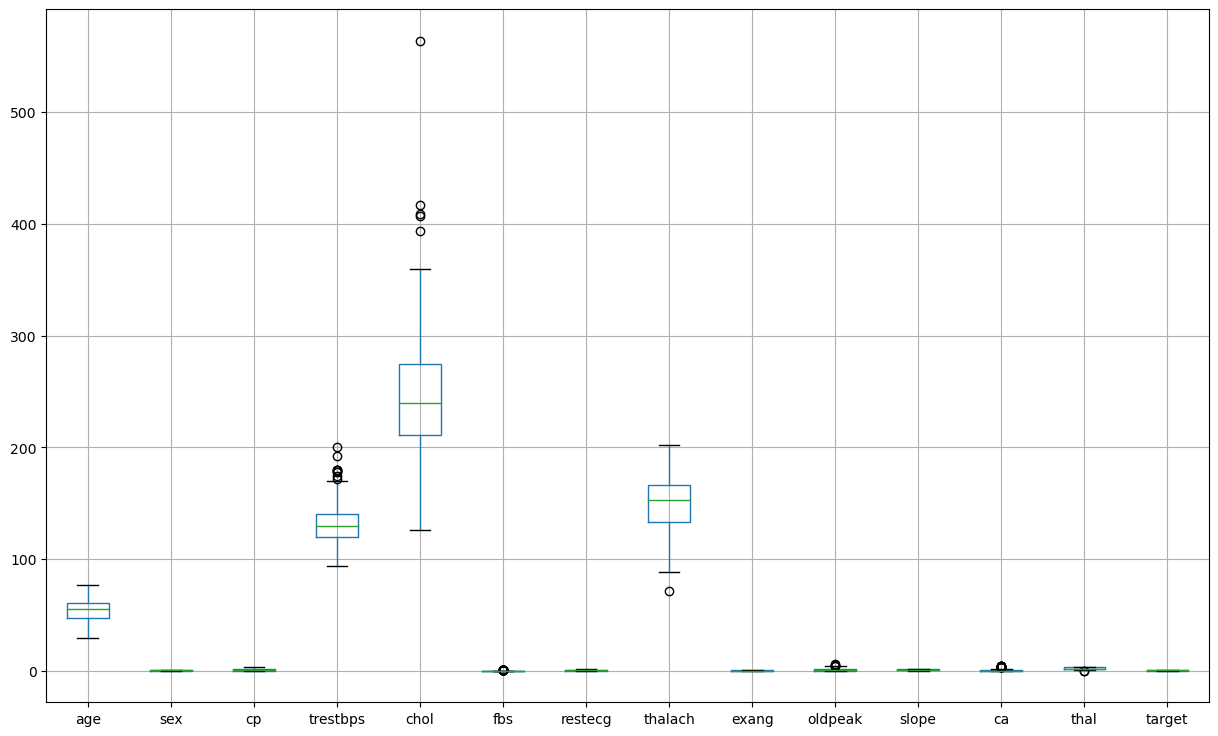

In [12]:
df.boxplot(figsize = (15,9))

In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
cols = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
for col in cols:
    print(f"Number of zeros for column {col} is: {(df[col]==0).sum()}")

Number of zeros for column age is: 0
Number of zeros for column sex is: 96
Number of zeros for column cp is: 143
Number of zeros for column trestbps is: 0
Number of zeros for column chol is: 0
Number of zeros for column fbs is: 258
Number of zeros for column restecg is: 147
Number of zeros for column thalach is: 0
Number of zeros for column exang is: 204
Number of zeros for column oldpeak is: 99
Number of zeros for column slope is: 21
Number of zeros for column ca is: 175
Number of zeros for column thal is: 2
Number of zeros for column target is: 138


https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm#:~:text=Top%20of%20Page-,Obesity%2C%20Unhealthy%20Diet%2C%20and%20Physical%20Inactivity,triglycerides%2C%20and%20type%202%20diabetes. 

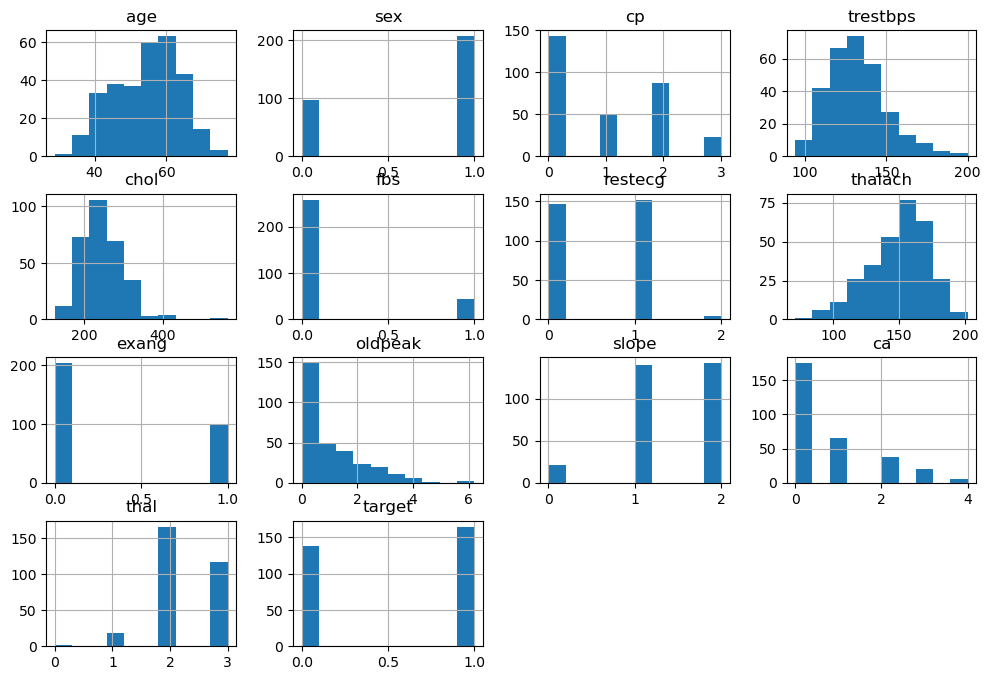

In [15]:
df.hist(figsize = (12, 8));

cp
0    [[AxesSubplot(0.125,0.722857;0.158163x0.157143...
1    [[AxesSubplot(0.125,0.722857;0.158163x0.157143...
2    [[AxesSubplot(0.125,0.722857;0.158163x0.157143...
3    [[AxesSubplot(0.125,0.722857;0.158163x0.157143...
dtype: object

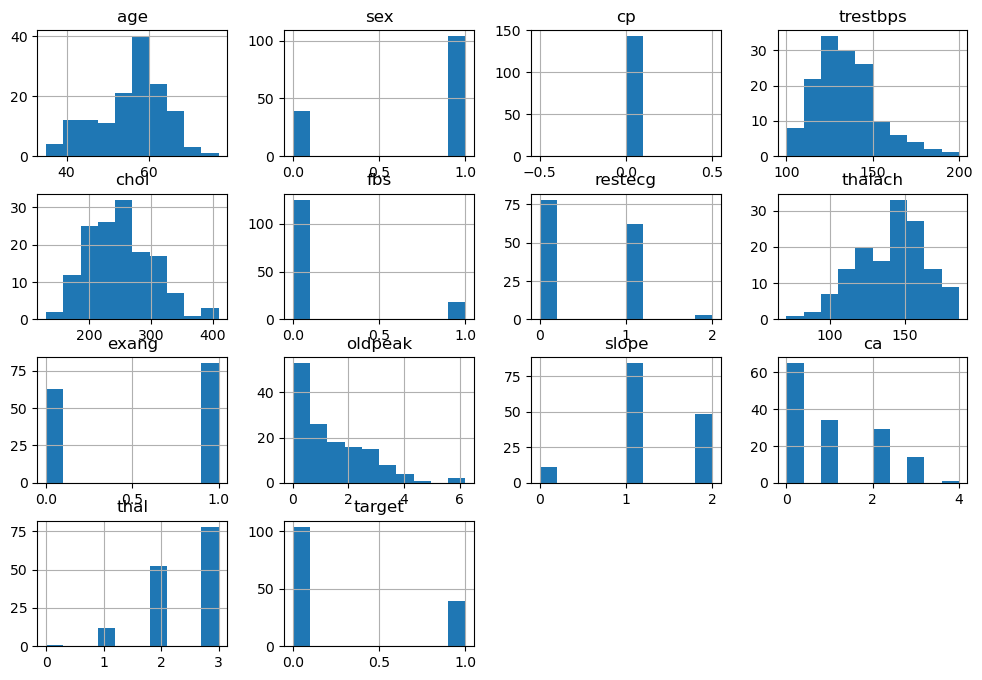

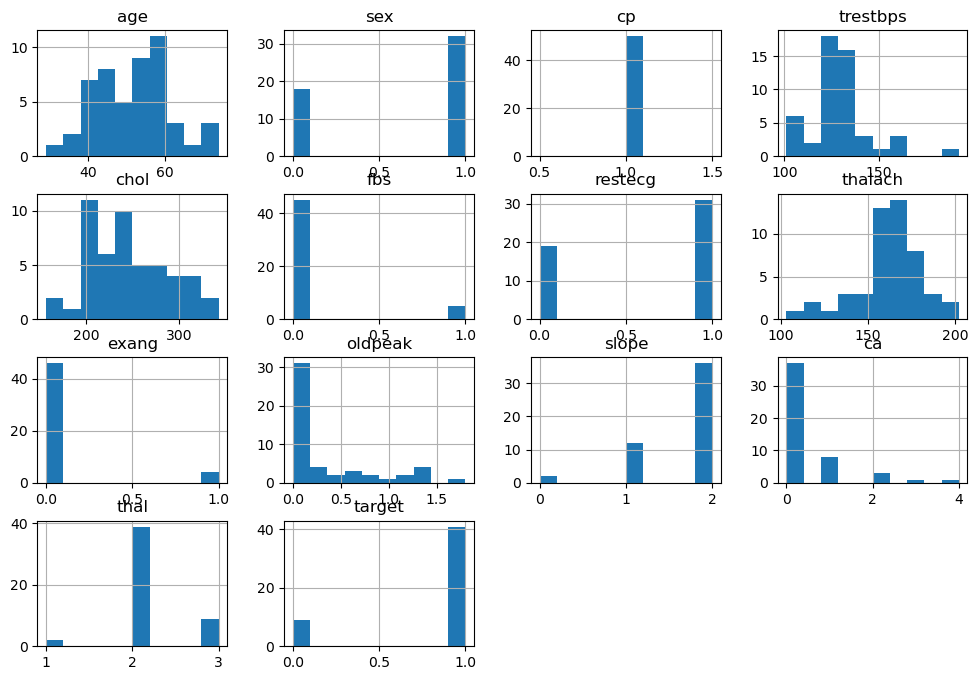

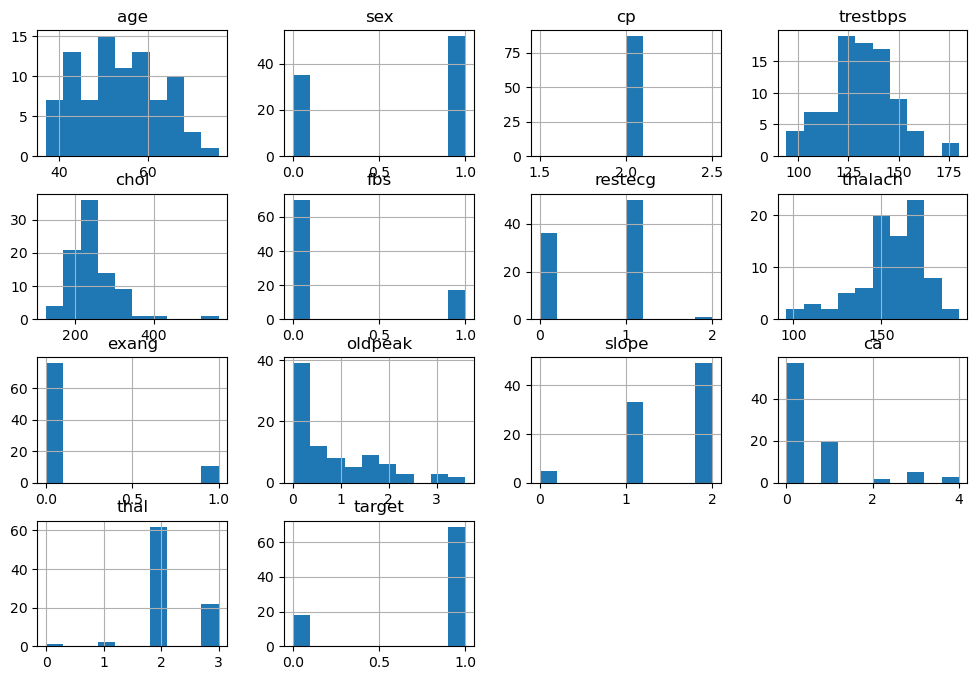

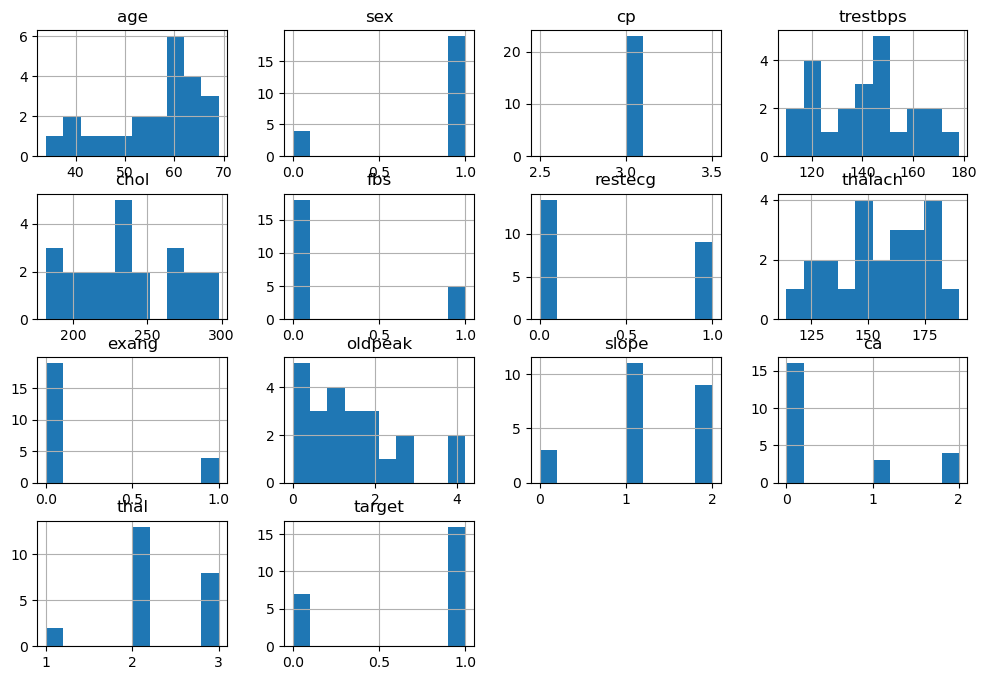

In [16]:
df.groupby('cp').hist(figsize = (12,8))

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


<AxesSubplot:>

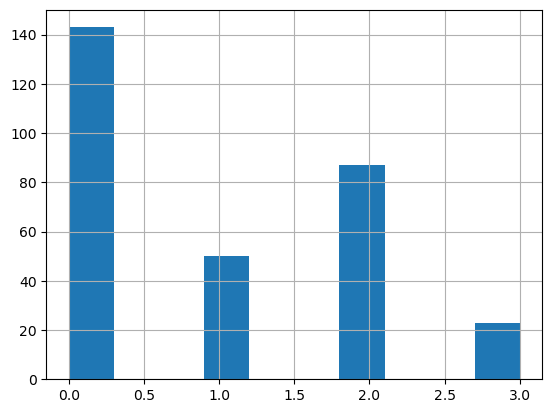

In [17]:
print(df.cp.value_counts())
df.cp.hist()

In [19]:
corr = df.corr()
corrSort = corr['cp'].sort_values(ascending=False)
print(corrSort)

cp          1.000000
target      0.433798
thalach     0.295762
slope       0.119717
fbs         0.094444
trestbps    0.047608
restecg     0.044421
sex        -0.049353
age        -0.068653
chol       -0.076904
oldpeak    -0.149230
thal       -0.161736
ca         -0.181053
exang      -0.394280
Name: cp, dtype: float64


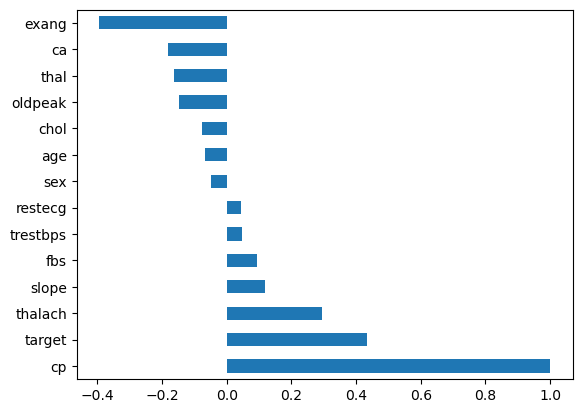

In [21]:
for row in corrSort:
    corrSort.plot.barh()

In [22]:
corr = df.corr()
corrSort = corr['thalach'].sort_values(ascending=False)
print(corrSort)

thalach     1.000000
target      0.421741
slope       0.386784
cp          0.295762
restecg     0.044123
fbs        -0.008567
chol       -0.009940
sex        -0.044020
trestbps   -0.046698
thal       -0.096439
ca         -0.213177
oldpeak    -0.344187
exang      -0.378812
age        -0.398522
Name: thalach, dtype: float64


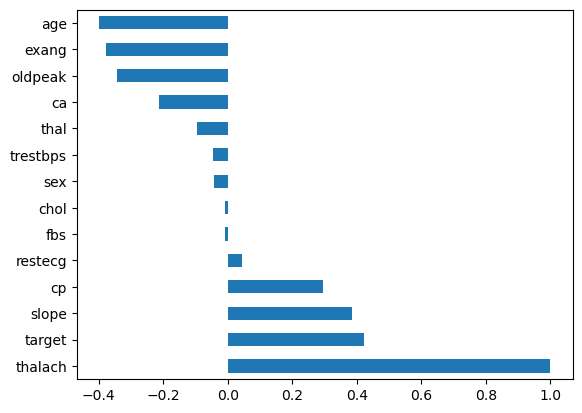

In [23]:
for row in corrSort:
    corrSort.plot.barh()

In [15]:
df.cov()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,82.484558,-0.416661,-0.643499,44.495902,100.585076,0.392433,-0.555013,-82.903318,0.413022,2.214583,-0.944791,2.566356,0.378139,-1.021343
sex,-0.416661,0.217166,-0.023736,-0.463970,-4.780309,0.007475,-0.014261,-0.469871,0.031014,0.051993,-0.008819,0.056357,0.059930,-0.065307
cp,-0.643499,-0.023736,1.065132,0.861714,-4.113774,0.034719,0.024108,6.991618,-0.191168,-0.178821,0.076137,-0.191080,-0.102201,0.223330
trestbps,44.495902,-0.463970,0.861714,307.586453,111.967215,1.109042,-1.052324,-18.759131,0.557111,3.934486,-1.312832,1.818373,0.668022,-1.267950
chol,100.585076,-4.780309,-4.113774,111.967215,2686.426748,0.245427,-4.116703,-11.800494,1.631991,3.246794,-0.128964,3.737252,3.135488,-2.203855
fbs,0.392433,0.007475,0.034719,1.109042,0.245427,0.126877,-0.015769,-0.069897,0.004295,0.002377,-0.013147,0.050259,-0.006983,-0.004983
restecg,-0.555013,-0.014261,0.024108,-1.052324,-4.116703,-0.015769,0.276528,0.531462,-0.017474,-0.035883,0.030151,-0.038741,-0.003858,0.035998
thalach,-82.903318,-0.469871,6.991618,-18.759131,-11.800494,-0.069897,0.531462,524.646406,-4.076290,-9.153518,5.459369,-4.993235,-1.352491,4.818766
exang,0.413022,0.031014,-0.191168,0.557111,1.631991,0.004295,-0.017474,-4.076290,0.220707,0.157216,-0.074618,0.055603,0.059472,-0.102354
oldpeak,2.214583,0.051993,-0.178821,3.934486,3.246794,0.002377,-0.035883,-9.153518,0.157216,1.348095,-0.413219,0.264396,0.149462,-0.249452


In [16]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [25]:
df1 = df["age"] 
df2 = df["thalach"]

print(ttest_1samp(df1, popmean = 0.966997))
print(ttest_1samp(df2, popmean = 0.966997))

Ttest_1sampResult(statistic=102.34600000811581, pvalue=1.751374345563658e-236)
Ttest_1sampResult(statistic=112.99003137470042, pvalue=3.9476718928239326e-249)
